# Módulo 3: La Sabiduría de las Masas (Random Forest)

## Objetivo Didáctico
Entender por qué 100 árboles "mediocres" son mejores que 1 árbol "experto". Introduciremos el concepto de **Bagging** (Bootstrap Aggregating).

## 1. La Analogía: El Concurso de Gelatina
Imagina que estás en una feria y hay que adivinar cuántos dulces hay en un frasco.
*   **Árbol de Decisión**: Le preguntas a una sola persona (experta). Si se equivoca, fallas.
*   **Random Forest**: Le preguntas a 100 personas al azar y promedias sus respuestas. El promedio suele ser increíblemente preciso porque los errores individuales se cancelan.

En ML, esto se llama **Ensamble**.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
df = pd.read_csv('../../data/processed/clean_student_data.csv')
df_binary = df[df['Target'].isin(['Dropout', 'Graduate'])].copy()
df_binary['Target_Binary'] = df_binary['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

features = [
    'Curricular units 1st sem (grade)', 
    'Age at enrollment', 
    'Tuition fees up to date', 
    'Scholarship holder', 
    'Debtor'
]

X = df_binary[features]
y = df_binary['Target_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. El Experto Inestable (Un Solo Árbol)
Vamos a entrenar un árbol sin límites (`max_depth=None`). Se aprenderá los datos de memoria (Overfitting).

In [3]:
tree_model = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_model.fit(X_train, y_train)
tree_acc = accuracy_score(y_test, tree_model.predict(X_test))
print(f"Precisión de un Solo Árbol: {tree_acc:.2%}")

Precisión de un Solo Árbol: 78.42%


## 3. La Sabiduría de las Masas (Random Forest)
Ahora entrenamos 100 árboles. Cada uno ve una parte diferente de los datos (Bootstrap) y decide por votación.

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Precisión del Random Forest: {rf_acc:.2%}")

mejora = rf_acc - tree_acc
print(f"Mejora: +{mejora:.2%}")

Precisión del Random Forest: 80.81%
Mejora: +2.39%


## 4. La Caja Negra y la Importancia de Variables
Ya no podemos dibujar el árbol porque hay 100. Hemos perdido transparencia visual, pero hemos ganado precisión.

Sin embargo, podemos preguntar: "¿Qué variables usaron más los árboles para decidir?"

/var/folders/2q/p20x_89x4xgcp2rqzvyzpb840000gn/T/ipykernel_22007/66784608.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


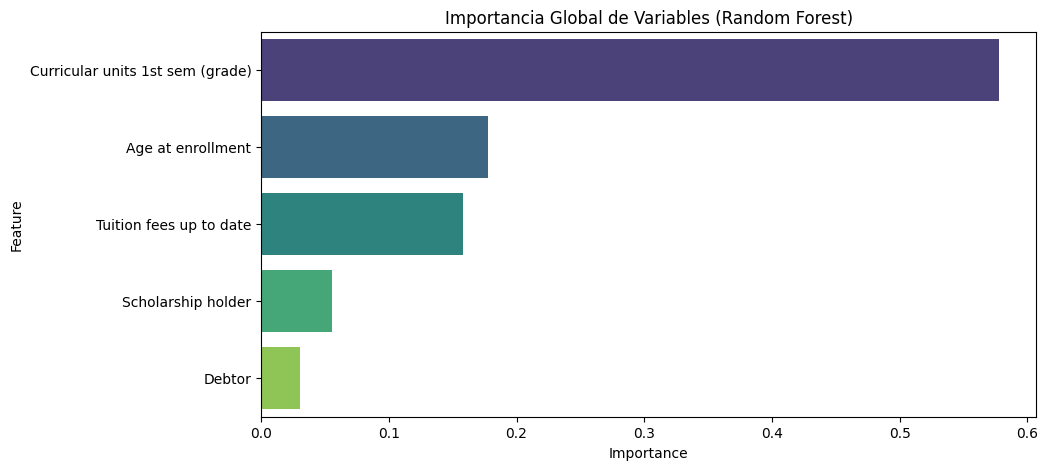

In [5]:
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia Global de Variables (Random Forest)')
plt.show()

### Interpretación
Fíjate en la diferencia con la Regresión Logística.
Aquí `Curricular units 1st sem (grade)` suele ser la reina indiscutible.

**El Problema**: Sabemos que la Nota es importante, pero... ¿una nota alta es buena o mala? (Obviamente buena, pero el gráfico no lo dice). Solo dice "Importante".

Para resolver eso, necesitamos SHAP (Módulo 5).